In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from autoviz.AutoViz_Class import AutoViz_Class
%matplotlib inline
AV = AutoViz_Class()
import folium


df = pd.read_pickle(r'pickles/df1.3.pkl')



Imported v0.1.905. Please call AutoViz in this sequence:
    AV = AutoViz_Class()
    %matplotlib inline
    dfte = AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=1, lowess=False,
               chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30, save_plot_dir=None)


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10152 entries, 0 to 10151
Data columns (total 81 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   Country/Region                         10152 non-null  object        
 1   Lat                                    10152 non-null  float64       
 2   Long                                   10152 non-null  float64       
 3   Date                                   10152 non-null  datetime64[ns]
 4   Confirmed                              10152 non-null  int64         
 5   Deaths                                 10152 non-null  int64         
 6   Recovered                              10152 non-null  int64         
 7   Active                                 10152 non-null  int64         
 8   Continent                              10152 non-null  object        
 9   Region                                 10152 non-null  object

In [3]:
df.columns

Index(['Country/Region', 'Lat', 'Long', 'Date', 'Confirmed', 'Deaths',
       'Recovered', 'Active', 'Continent', 'Region', 'Continent_Asia',
       'Continent_Europe', 'Region_encoded', 'Running_Days',
       'Active/100 Cases', 'Recovered/100 Cases', 'Dead/100 Cases',
       'New Deaths', 'New Active', 'New Recovered', 'WW_Confirmed',
       'WW_Deaths', 'WW_Recovered', 'WW_Active', 'WW_New cases',
       'WW_New deaths', 'WW_New recovered', 'WW_Deaths / 100 Cases',
       'WW_Recovered / 100 Cases', 'WW_Deaths / 100 Recovered',
       'WW_No. of countries', 'r', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_7day_smoothed', 'new_tests_per_thousand_7day_smoothed',
       'Grocery and pharmacy', 'Parks', 'Residential', 'Retail and recreation',
       'Transit stations', 'Workplaces', 'c1m_school_closing',
       'c2m_workplace_closing', 'c3m_cancel_public_events',
       'c4m_restrictions_on_gatherings', 'c5m_close_public_tra

In [4]:
df.describe()

,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,Region_encoded,Running_Days,Active/100 Cases,Recovered/100 Cases,Dead/100 Cases,New Deaths,New Active,New Recovered,WW_Confirmed,WW_Deaths,WW_Recovered,WW_Active,WW_New cases,WW_New deaths,WW_New recovered,WW_Deaths / 100 Cases,WW_Recovered / 100 Cases,WW_Deaths / 100 Recovered,WW_No. of countries,r,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_7day_smoothed,new_tests_per_thousand_7day_smoothed,Grocery and pharmacy,Parks,Residential,Retail and recreation,Transit stations,Workplaces,c1m_school_closing,c2m_workplace_closing,c3m_cancel_public_events,c4m_restrictions_on_gatherings,c5m_close_public_transport,c6m_stay_at_home_requirements,c7m_restrictions_on_internal_movement,c8ev_international_travel_controls,e1_income_support,e2_debt_contract_relief,h1_public_information_campaigns,h2_testing_policy,h3_contact_tracing,h6m_facial_coverings,Population,Pop_Group_encoded,Pop.Density,Density_Group_encoded,% aging.pop,% young.pop,GDP,% healthcare,GDP_billions,GDP_per_capita,% smoking,r_nan_flag,Grocery and pharmacy_missing,Parks_missing,Residential_missing,Retail and recreation_missing,Transit stations_missing,Workplaces_missing,Tests_Estimated_Flag,total_tests_per_100,new_tests_per_100
count,10152.000000,10152.000000,10152,10152.000000,10152.000000,10152.000000,10152.000000,10152.000000,10152.000000,10152.000000,10152.000000,10152.000000,10152.000000,10152.000000,10152.000000,1.015200e+04,10152.000000,1.015200e+04,1.015200e+04,10152.000000,10152.000000,10152.000000,10152.000000,10152.000000,10152.000000,10152.000000,10152.000000,1.015200e+04,10152.000000,10152.000000,10152.000000,10152.000000,10152.000000,10152.000000,10152.000000,10152.000000,10152.000000,10152.000000,10152.000000,10152.000000,10152.000000,10152.000000,10152.000000,10152.000000,10152.000000,10152.000000,10152.000000,10152.000000,1.015200e+04,10152.000000,10152.000000,10152.000000,1.015200e+04,1.015200e+04,10152.000000,10152.000000,10152.000000,10152.000000,10152.000000,1.015200e+04,10152.000000,10152.000000,10152.000000,10152.000000,10152.000000,10152.000000,10152.000000,10152.000000,10152.000000,10152.000000,10152.000000,10152.000000,10152.000000,10152.000000
mean,47.095185,22.407593,2020-04-24 12:00:00.000000256,24442.358058,1896.564125,12084.993696,10460.800236,3.888889,93.500000,42.501562,34.926942,3.018691,21.000690,168.714835,197.362293,4.406960e+06,230770.760638,2.066001e+06,2.110188e+06,87771.021277,3478.824468,50362.015957,4.860638,34.343936,22.104521,144.351064,0.757160,4.555862e+05,8888.772163,29.870957,0.628982,8519.257056,0.596345,-7.357378,23.231195,6.773882,-22.675289,-23.903802,-21.688294,1.736761,1.332112,1.293282,2.240406,0.596710,0.883846,0.770075,2.431797,1.020489,8.836288e-01,1.658412,1.377443,1.146099,9.198385e-01,1.715480e+07,3.888889,501.260185,1.111111,26.642222,27.362222,4.194932e+11,5.780185,419.492778,32821.504444,27.116667,0.319050,0.195232,0.200355,0.200355,0.195134,0.184594,0.184594,0.136229,2.955060,0.062421
min,31.050000,-19.020000,2020-01-22 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.550000e+02,17.000000,2.800000e+01,5.100000e+02,0.000000,0.000000,0.000000,2.040000,1.710000,6.260000,6.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,-65.290000,-83.710000,-4.290000,-91.710000,-86.140000,-75.570000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.110223e-16,0.000000,0.000000,0.000000,1.110223e-16,3.477000e+04,0.000000,3.630000,0.000000,5.410000,18.510000,1.544714e+09,0.390000,1.540000,834.310000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,41.610000,9.500000,2020-03-08 18:00:00,11.000000,0.000000,0.000000,3.000000,2.000000,46.750000,2.247500,0.000000,0.000000,0.000000,0.000000,0.000000,1.121910e+05,3935.000000,6.044125e+04,5.864175e+04,5568.500000,250.750000,2488.25

In [5]:

# Use country-level unique values (last available date)
latest = (
    df.sort_values("Date")
      .groupby("Country/Region", as_index=False)
      .last()[["Country/Region", "Lat", "Long", "Confirmed"]]
)

# Create the base map centered roughly on Europe/Asia
m = folium.Map(location=[50, 20], zoom_start=3, tiles="cartodbpositron")

# Add bubbles scaled by New Active cases
for _, row in latest.iterrows():
    if pd.notna(row["Confirmed"]) and row["Confirmed"] > 0:
        folium.CircleMarker(
            location=[row["Lat"], row["Long"]],
            radius=max(2, min(row["Confirmed"] ** 0.3, 25)),  # scale radius nonlinearly
            color=None,
            fill=True,
            fill_opacity=0.6,
            fill_color="red",
            popup=f"{row['Country/Region']}: {int(row['Confirmed'])} total confirmed"
        ).add_to(m)

m

In [6]:
df_model = df.drop(columns=df.select_dtypes(include=['object', 'category', 'string', 'datetime']).columns)

In [7]:
df_model.corr().round(1)

,Lat,Long,Confirmed,Deaths,Recovered,Active,Continent_Asia,Continent_Europe,Region_encoded,Running_Days,Active/100 Cases,Recovered/100 Cases,Dead/100 Cases,New Deaths,New Active,New Recovered,WW_Confirmed,WW_Deaths,WW_Recovered,WW_Active,WW_New cases,WW_New deaths,WW_New recovered,WW_Deaths / 100 Cases,WW_Recovered / 100 Cases,WW_Deaths / 100 Recovered,WW_No. of countries,r,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_7day_smoothed,new_tests_per_thousand_7day_smoothed,Grocery and pharmacy,Parks,Residential,Retail and recreation,Transit stations,Workplaces,c1m_school_closing,c2m_workplace_closing,c3m_cancel_public_events,c4m_restrictions_on_gatherings,c5m_close_public_transport,c6m_stay_at_home_requirements,c7m_restrictions_on_internal_movement,c8ev_international_travel_controls,e1_income_support,e2_debt_contract_relief,h1_public_information_campaigns,h2_testing_policy,h3_contact_tracing,h6m_facial_coverings,Population,Pop_Group_encoded,Pop.Density,Density_Group_encoded,% aging.pop,% young.pop,GDP,% healthcare,GDP_billions,GDP_per_capita,% smoking,r_nan_flag,Grocery and pharmacy_missing,Parks_missing,Residential_missing,Retail and recreation_missing,Transit stations_missing,Workplaces_missing,Tests_Estimated_Flag,total_tests_per_100,new_tests_per_100
Lat,1.0,-0.2,0.1,0.0,0.0,0.2,-0.4,0.4,0.1,-0.0,0.1,0.0,0.1,0.0,0.1,0.1,0.0,-0.0,-0.0,0.0,-0.0,0.0,0.0,-0.0,-0.0,-0.0,0.0,0.0,0.2,0.2,0.1,0.0,0.2,0.0,0.2,0.3,-0.1,0.1,0.0,-0.0,-0.1,-0.0,-0.1,0.0,-0.2,-0.2,-0.1,-0.1,0.1,-0.0,-0.0,0.0,-0.1,-0.2,0.2,0.1,-0.1,-0.4,0.2,-0.2,0.2,0.4,0.2,0.2,-0.2,-0.1,-0.2,-0.2,-0.2,-0.2,-0.2,-0.2,-0.2,0.1,0.0
Long,-0.2,1.0,0.1,-0.2,0.1,0.1,0.6,-0.6,-0.5,0.0,-0.0,-0.0,-0.3,-0.1,0.1,0.2,0.0,0.0,-0.0,-0.0,-0.0,0.0,0.0,-0.0,0.0,-0.0,-0.0,0.0,0.2,0.2,-0.1,-0.1,0.3,-0.1,-0.0,-0.1,-0.2,0.1,0.2,0.2,0.0,-0.0,0.0,-0.0,0.2,0.1,0.1,0.2,-0.3,-0.1,-0.1,-0.0,0.0,0.1,0.3,-0.5,-0.1,-0.4,-0.5,0.6,-0.2,-0.5,-0.2,-0.5,0.0,0.0,0.0,-0.0,-0.0,0.0,0.0,0.0,0.2,-0.1,-0.1
Confirmed,0.1,0.1,1.0,0.7,0.9,0.8,-0.1,0.1,0.2,0.3,0.0,0.1,0.4,0.4,0.3,0.7,0.3,0.3,0.3,0.3,0.3,0.2,0.3,0.1,0.2,-0.1,0.2,0.1,0.9,0.7,0.2,0.0,0.9,0.1,-0.1,0.1,0.1,-0.1,-0.2,-0.2,0.2,0.2,0.2,0.2,0.0,0.1,0.2,0.1,0.2,0.3,0.2,0.3,0.2,0.3,0.6,0.2,-0.0,0.0,0.0,-0.1,0.5,0.2,0.5,-0.0,-0.0,-0.2,-0.2,-0.2,-0.2,-0.2,-0.1,-0.1,-0.1,0.2,0.1
Deaths,0.0,-0.2,0.7,1.0,0.5,0.7,-0.1,0.1,0.3,0.2,0.0,0.0,0.7,0.4,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.1,0.2,-0.1,0.2,0.1,0.5,0.4,0.1,0.0,0.4,0.0,-0.2,0.0,0.2,-0.2,-0.2,-0.2,0.2,0.2,0.2,0.2,0.0,0.1,0.2,0.1,0.2,0.3,0.1,0.2,0.1,0.3,0.4,0.3,-0.0,0.1,0.1,-0.1,0.6,0.3,0.6,0.0,-0.1,-0.2,-0.1,-0.1,-0.1,-0.1,-0.1,-0.1,-0.1,0.1,0.0
Recovered,0.0,0.1,0.9,0.5,1.0,0.5,-0.0,0.0,0.1,0.3,-0.1,0.3,0.2,0.2,0.1,0.6,0.3,0.3,0.3,0.3,0.3,0.2,0.3,0.1,0.2,-0.1,0.2,0.1,0.9,0.6,0.2,0.0,0.8,0.1,0.0,0.1,-0.0,-0.0,-0.0,-0.1,0.1,0.1,0.2,0.1,-0.0,0.0,0.1,0.1,0.2,0.2,0.1,0.3,0.2,0.3,0.5,0.1,-0.0,-0.0,0.0,-0.1,0.4,0.1,0.4,-0.0,-0.0,-0.2,-0.1,-0.1,-0.1,-0.1,-0.1,-0.1,-0.1,0.2,0.0
Active,0.2,0.1,0.8,0.7,0.5,1.0,-0.1,0.1,0.2,0.2,0.2,-0.0,0.5,0.5,0.4,0.6,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.1,-0.1,0.2,0.1,0.7,0.7,0.1,0.0,0.8,0.1,-0.1,0.0,0.2,-0.2,-0.2,-0.2,0.2,0.2,0.2,0.2,0.1,0.1,0.2,0.1,0.2,0.3,0.1,0.2,0.1,0.2,0.6,0.2,-0.0,0.0,0.0,-0.0,0.5,0.3,0.5,-0.0,-0.1,-0.2,-0.1,-0.1,-0.1,-0.1,-0.1,-0.1,-0.1,0.1,0.0
Continent_Asia,-0.4,0.6,-0.1,-0.1,-0.0,-0.1,1.0,-1.0,-0.3,0.0,-0.0,-0.0,-0.2,-0.1,-0.0,0.0,0.0,-0.0,0.0,-0.0,-0.0,-0.0,-0.0,0.0,-0.0,-0.0,-0.0,0.0,-0.0,-0.0,-0.1,-0.0,-0.0,-0.1,-0.1,-0.2,-0.1,0.1,0.2,0.2,-0.0,-0.0,0.0,-0.1,0.1,0.2,0.1,0.2,-0.2,-0.2,0.0,-0.0,0.0,0.1,0.0,-0.3,-0.1,-0.1,-0.6,0.8,-0.1,-0.5,-0.1,-0.3,-0.3,0.0,0.1,0.1,0.1,0.1,0.1,0.1,0.3,-0.1,-0.0
Continent_Europe,0.4,-0.6,0.1,0.1,0.0,0.1,-1.0,1.0,0.3,0.0,0.0,0.0,0.2,0.1,0.0,-0.0,-0.0,0.0,-0.0,0.0,0.0,0.0,0.0,-0.0,0.0,0.0,0.0,-0.0,0.0,0.0,0.1,0.0,0.0,0.1,0.1,0.2,0.1,-0.1,-0.2,-0.2,0.0,0.0,-0.0,0.1,-0.1,-0.2,-0.1,-0.2,0.2,0.2,-0.0,0.0,-0.0,-0.1,-0.0,0.3,0.1,0.1,0.6,-0.8,0.1,0.5,0.1,0.3,0.3,-0.0,-0.1,-0.1,-0.1,-0.1,-0.1,-0.1,-0.3,0.1,0.

In [8]:
corr_before = df[['Running_Days', 'Active/100 Cases']].corr().iloc[0,1]
corr_after = df[(df['Active/100 Cases'] < df['Active/100 Cases'].quantile(0.95)) &
                (df['Active/100 Cases'] > df['Active/100 Cases'].quantile(0.05))]\
                [['Running_Days', 'Active/100 Cases']].corr().iloc[0,1]
print(corr_before, corr_after)

-0.08154746102870294 -0.6958707913981336


In [9]:
import numpy as np

df['log_Running_Days'] = np.log(df['Running_Days'] + 1)

In [10]:
corr_linear = df[['Running_Days', 'Active/100 Cases']].corr().iloc[0,1]
corr_log = df[['log_Running_Days', 'Active/100 Cases']].corr().iloc[0,1]
print('Linear correlation:', corr_linear)
print('Log-transformed correlation:', corr_log)

Linear correlation: -0.08154746102870294
Log-transformed correlation: 0.14848527543150425


In [11]:

corr_review = df.groupby('Region')[['Dead/100 Cases','% aging.pop', '% young.pop','Pop.Density','GDP_per_capita','% healthcare']].mean().round(2).sort_values(by='% aging.pop', ascending=False)
corr_review

,Dead/100 Cases,% aging.pop,% young.pop,Pop.Density,GDP_per_capita,% healthcare
Region,,,,,,
Southern Europe,4.16,33.91,21.20,2417.64,45522.08,6.47
Northern Europe,2.45,30.54,26.05,39.29,43984.44,7.51
Western Europe,5.25,28.51,24.82,242.36,72926.90,6.99
Eastern Europe,2.78,27.51,24.53,86.64,13606.58,5.38
Balkans,2.17,26.12,25.49,86.16,7570.20,5.37
Caucasus,0.97,17.13,32.07,97.43,4266.48,2.78
Other,1.28,16.62,40.07,267.09,26617.70,4.44
Central Asia,0.56,8.50,51.38,47.19,3204.85,2.48


In [12]:
corr_review.corr()

,Dead/100 Cases,% aging.pop,% young.pop,Pop.Density,GDP_per_capita,% healthcare
Dead/100 Cases,1.000000,0.807829,-0.743481,0.464647,0.853982,0.806084
% aging.pop,0.807829,1.000000,-0.947794,0.482675,0.624907,0.905065
% young.pop,-0.743481,-0.947794,1.000000,-0.376803,-0.485692,-0.770557
Pop.Density,0.464647,0.482675,-0.376803,1.000000,0.347373,0.296042
GDP_per_capita,0.853982,0.624907,-0.485692,0.347373,1.000000,0.799060
% healthcare,0.806084,0.905065,-0.770557,0.296042,0.799060,1.000000


In [13]:
df_model.corr(numeric_only=True)['New Deaths'].sort_values(ascending=False).head(15)

New Deaths                 1.000000
New Active                 0.493965
Active                     0.479328
GDP_billions               0.412063
GDP                        0.412063
Deaths                     0.404438
Dead/100 Cases             0.391841
Residential                0.382657
Confirmed                  0.362286
Population                 0.333618
New Recovered              0.332294
new_tests_7day_smoothed    0.268783
c2m_workplace_closing      0.254682
new_tests                  0.231508
% healthcare               0.230689
Name: New Deaths, dtype: float64

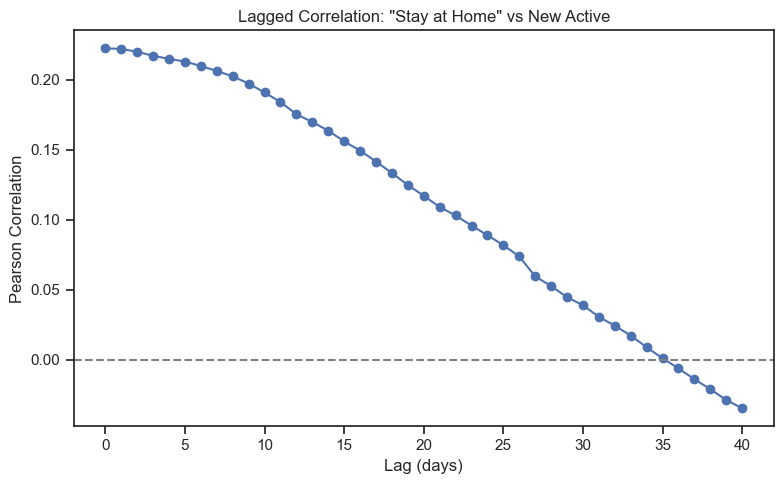

In [14]:
# Choose the feature to test
col = 'c6m_stay_at_home_requirements'

# Store correlations for several lag periods (0–40 days)
lags = range(0, 41)
corrs = []

for lag in lags:
    shifted = df['New Active'].shift(-lag)
    corr = df[col].corr(shifted)
    corrs.append(corr)

# Create dataframe of lag correlations
lag_df = pd.DataFrame({'Lag (days)': lags, 'Correlation': corrs})

# Plot
plt.figure(figsize=(8,5))
plt.plot(lag_df['Lag (days)'], lag_df['Correlation'], marker='o')
plt.axhline(0, color='gray', linestyle='--')
plt.title(f'Lagged Correlation: "Stay at Home" vs New Active')
plt.xlabel('Lag (days)')
plt.ylabel('Pearson Correlation')
plt.tight_layout()
plt.show()

In [15]:
best_lag = lag_df.loc[lag_df['Correlation'] < 0, 'Lag (days)'].min()
print(f"Correlation turns negative around day {best_lag}")

Correlation turns negative around day 36


In [16]:
#restriction policy correlation
policy_cols = [
    'c2m_workplace_closing', 'c3m_cancel_public_events',
    'c4m_restrictions_on_gatherings', 'c5m_close_public_transport',
    'c6m_stay_at_home_requirements', 'c7m_restrictions_on_internal_movement',
    'c8ev_international_travel_controls', 'e1_income_support',
    'e2_debt_contract_relief', 'h1_public_information_campaigns',
    'h2_testing_policy', 'h3_contact_tracing', 'h6m_facial_coverings'
]

corrs = df[policy_cols + ['New Active']].corr()['New Active'].sort_values(ascending=False)

corrs

New Active                               1.000000
c6m_stay_at_home_requirements            0.222343
c2m_workplace_closing                    0.206031
c7m_restrictions_on_internal_movement    0.200352
c3m_cancel_public_events                 0.164887
c4m_restrictions_on_gatherings           0.160705
e2_debt_contract_relief                  0.134322
h1_public_information_campaigns          0.104575
e1_income_support                        0.102312
h2_testing_policy                        0.100576
c5m_close_public_transport               0.084599
c8ev_international_travel_controls       0.073340
h6m_facial_coverings                     0.054825
h3_contact_tracing                       0.035339
Name: New Active, dtype: float64

In [17]:
df['New_Active_lag14'] = df['New Active'].shift(-14)

for p in ['c6m_stay_at_home_requirements','c2m_workplace_closing','c7m_restrictions_on_internal_movement']:
    corr = df[[p,'New_Active_lag14']].corr().iloc[0,1]
    print(f'{p}: {corr:.3f}')

c6m_stay_at_home_requirements: 0.164
c2m_workplace_closing: 0.141
c7m_restrictions_on_internal_movement: 0.138
